# Laboratorio 4 - Pipeline
Andrea Cecilia Rivas Castañeda
16001120

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

In [2]:
X_train = pd.read_csv('prep_Xtrain.csv')
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,1.0,0.730471,0.125,0.166667,0.166667,0.818980,0.0
1,0.5,0.0,0.524569,0.125,0.333333,0.333333,0.601092,0.5
2,1.0,0.0,0.487252,0.000,0.000000,0.000000,0.352955,0.0
3,1.0,1.0,0.303055,0.000,0.333333,0.333333,0.516728,0.0
4,1.0,1.0,0.404032,0.000,0.000000,0.000000,0.347554,1.0


In [3]:
y_train = pd.read_csv('prep_ytrain.csv')

In [4]:
X_test = pd.read_csv('prep_Xtest.csv')
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,0.0,0.512392,0.000,0.000000,0.000000,0.334193,0.0
1,1.0,0.0,0.460942,0.000,0.000000,0.166667,0.381960,0.0
2,0.5,0.0,0.524569,0.000,0.000000,0.000000,0.422864,0.0
3,1.0,0.0,0.303055,0.375,0.333333,0.833333,0.538998,0.0
4,1.0,1.0,0.756989,0.125,0.500000,0.500000,0.571391,0.0


In [5]:
y_test = pd.read_csv('prep_ytest.csv')

# Selección de Variables

In [6]:
df_copy = X_train.copy()
df_copy['survived'] = y_train
df_copy.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,survived
0,0.0,1.0,0.730471,0.125,0.166667,0.166667,0.818980,0.0,1
1,0.5,0.0,0.524569,0.125,0.333333,0.333333,0.601092,0.5,0
2,1.0,0.0,0.487252,0.000,0.000000,0.000000,0.352955,0.0,0
3,1.0,1.0,0.303055,0.000,0.333333,0.333333,0.516728,0.0,0
4,1.0,1.0,0.404032,0.000,0.000000,0.000000,0.347554,1.0,1


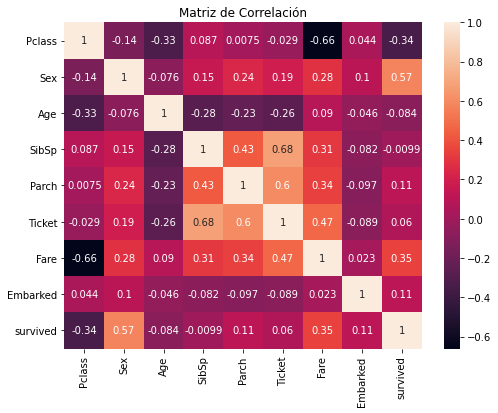

In [7]:
corr_df = df_copy.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.title('Matriz de Correlación')
plt.show()

In [8]:
# FP
lasso = LassoCV().fit(X_train, y_train)
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=2, direction="forward").fit(X_train, y_train)
X_train.columns[sfs_forward.get_support()]

Index(['Pclass', 'Sex'], dtype='object')

In [9]:
# BP
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=2, direction="backward").fit(X_train, y_train)
X_train.columns[sfs_forward.get_support()]

Index(['Pclass', 'Sex'], dtype='object')

* Se seleccionaron las variables *Pclass* y *Sex*

In [10]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object')

# Selección de Modelos

In [11]:
lr = "LogisticRegression().fit(X_train, y_train)"
svm = 'SVC(gamma="scale", kernel="rbf").fit(X_train, y_train)'
dt = 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)'
knn = 'KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)'
nb = 'GaussianNB().fit(X_train, y_train)'
lda = 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)'
qda = 'QuadraticDiscriminantAnalysis(store_covariance = True).fit(X_train, y_train)'
rf = 'RandomForestClassifier(n_estimators=100).fit(X_train, y_train)'

model_list = {'lr': lr, "svm": svm, "dt": dt, "knn": knn, "nb": nb, "lda": lda, "qda": qda, "rf": rf}

model_list

{'lr': 'LogisticRegression().fit(X_train, y_train)',
 'svm': 'SVC(gamma="scale", kernel="rbf").fit(X_train, y_train)',
 'dt': 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)',
 'knn': 'KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)',
 'nb': 'GaussianNB().fit(X_train, y_train)',
 'lda': 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)',
 'qda': 'QuadraticDiscriminantAnalysis(store_covariance = True).fit(X_train, y_train)',
 'rf': 'RandomForestClassifier(n_estimators=100).fit(X_train, y_train)'}

In [12]:
train_model_list = {}

for model_name, model in model_list.items():
    boot = resample(df_copy[['Pclass', 'Sex','survived']], replace=True, n_samples=200, random_state=2021)
    X_train = boot.drop("survived", axis=1)
    y_train = boot.survived
    train_model = eval(model)
    train_model_list[model_name] = train_model

train_model_list

{'lr': LogisticRegression(),
 'svm': SVC(),
 'dt': DecisionTreeClassifier(max_depth=4),
 'knn': KNeighborsClassifier(),
 'nb': GaussianNB(),
 'lda': LinearDiscriminantAnalysis(store_covariance=True),
 'qda': QuadraticDiscriminantAnalysis(store_covariance=True),
 'rf': RandomForestClassifier()}

In [13]:
acc_scores = {} #Diccionario de Scores
auc_roc_scores = {}

result_matrix = pd.DataFrame(columns=np.arange(0, len(y_test), 1))
#result_matrix

for model_name, train_model in train_model_list.items():
    predicciones = train_model.predict(X_test[['Pclass', 'Sex']])
    acc = accuracy_score(y_test, predicciones)
    aucroc = roc_auc_score(y_test, predicciones)
    acc_scores[model_name] = acc
    auc_roc_scores[model_name] = aucroc
    tempDf = pd.DataFrame(predicciones).T
    result_matrix = result_matrix.append(tempDf)

result_matrix.index = list(train_model_list.keys())

In [14]:
sorted(acc_scores.items(), key=lambda x: x[1])

[('lr', 0.7089552238805971),
 ('svm', 0.7089552238805971),
 ('dt', 0.7089552238805971),
 ('knn', 0.7089552238805971),
 ('nb', 0.7089552238805971),
 ('lda', 0.7089552238805971),
 ('qda', 0.7089552238805971),
 ('rf', 0.7089552238805971)]

In [15]:
sorted(auc_roc_scores.items(), key=lambda x: x[1])

[('lr', 0.6848030018761726),
 ('svm', 0.6848030018761726),
 ('dt', 0.6848030018761726),
 ('knn', 0.6848030018761726),
 ('nb', 0.6848030018761726),
 ('lda', 0.6848030018761726),
 ('qda', 0.6848030018761726),
 ('rf', 0.6848030018761726)]

* Se seleccionó el modelo de regresión logística